In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Chapter 6 Decision Trees
#### created on 2022-03-14

In [9]:
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [3]:
iris = datasets.load_iris()
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
X=iris.data[:,2:]
y=iris.target

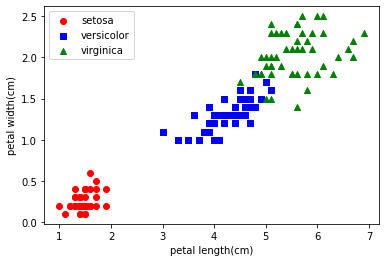

In [14]:
plt.scatter(X[y==0][:,0],X[y==0][:,1],marker = "o",color="red",label = "setosa")
plt.scatter(X[y==1][:,0],X[y==1][:,1],marker = "s",color='blue',label ="versicolor")
plt.scatter(X[y==2][:,0],X[y==2][:,1],marker = "^",color='green',label ="virginica")
plt.xlabel("petal length(cm)")
plt.ylabel("petal width(cm)")
plt.legend()

In [15]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

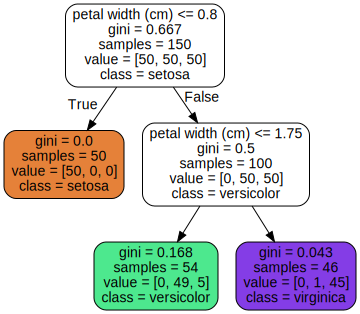

In [17]:
dot_data = export_graphviz(tree_clf, out_file = None,feature_names=iris.feature_names[2:],class_names = iris.target_names,
                rounded = True, filled=True)

graph = graphviz.Source(dot_data)
graph

## Exercise 7 & 8
#### Train and fine tune a Decision Tree

In [110]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

Text(0.5, 1.0, 'Data')

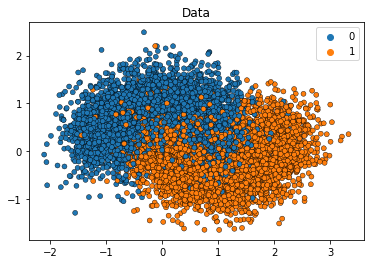

In [46]:
X, y = make_moons(noise=0.4, random_state=1, n_samples=10000)
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k",
).set_title("Data")

In [108]:
X[:,0].mean(), X[:,0].std(),X[:,1].mean(), X[:,1].std()

(0.5009054831581842,
 0.9594798372984037,
 0.2521690487610654,
 0.6335427547154089)

In [111]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [114]:
Xstd[:,0].mean(),Xstd[:,0].std(),Xstd[:,1].mean(),Xstd[:,1].std()

(3.001687787218543e-15,
 0.9999999999999992,
 -3.064215547965432e-16,
 1.0000000000000009)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(Xstd, y, test_size=0.2, random_state=42)

In [116]:
tree_clf =DecisionTreeClassifier(max_leaf_nodes = 5)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_leaf_nodes=5)

In [117]:
y_predict = tree_clf.predict(X)

In [118]:
cm = confusion_matrix(y_predict,y)
print("Accuracy Score:", accuracy_score(y_predict,y))
print("Confusion Matrix:\n", cm)

Accuracy Score: 0.8508
Confusion Matrix:
 [[4348  840]
 [ 652 4160]]


In [119]:
scores = cross_val_score(tree_clf,X,y, scoring = "accuracy",cv=5)

In [120]:
(scores.mean(), scores.std())

(0.8488, 0.00536283507111678)

In [129]:
param_grid=[{'max_leaf_nodes':list(range(2,31)),'min_samples_split':[2,3,4,5,6]}]

In [130]:
grid_search =GridSearchCV(tree_clf, param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_leaf_nodes=5),
             param_grid=[{'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19, 20, 21,
                                             22, 23, 24, 25, 26, 27, 28, 29,
                                             30],
                          'min_samples_split': [2, 3, 4, 5, 6]}],
             scoring='accuracy')

In [131]:
grid_search.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=14)

In [132]:
curves = grid_search.cv_results_
for mean_score, params in zip(curves['mean_test_score'],curves['params']):
    print(mean_score,params)

0.759625 {'max_leaf_nodes': 2, 'min_samples_split': 2}
0.759625 {'max_leaf_nodes': 2, 'min_samples_split': 3}
0.759625 {'max_leaf_nodes': 2, 'min_samples_split': 4}
0.759625 {'max_leaf_nodes': 2, 'min_samples_split': 5}
0.759625 {'max_leaf_nodes': 2, 'min_samples_split': 6}
0.8074999999999999 {'max_leaf_nodes': 3, 'min_samples_split': 2}
0.8074999999999999 {'max_leaf_nodes': 3, 'min_samples_split': 3}
0.8074999999999999 {'max_leaf_nodes': 3, 'min_samples_split': 4}
0.8074999999999999 {'max_leaf_nodes': 3, 'min_samples_split': 5}
0.8074999999999999 {'max_leaf_nodes': 3, 'min_samples_split': 6}
0.84475 {'max_leaf_nodes': 4, 'min_samples_split': 2}
0.84475 {'max_leaf_nodes': 4, 'min_samples_split': 3}
0.84475 {'max_leaf_nodes': 4, 'min_samples_split': 4}
0.84475 {'max_leaf_nodes': 4, 'min_samples_split': 5}
0.84475 {'max_leaf_nodes': 4, 'min_samples_split': 6}
0.84475 {'max_leaf_nodes': 5, 'min_samples_split': 2}
0.84475 {'max_leaf_nodes': 5, 'min_samples_split': 3}
0.84475 {'max_leaf_nod

In [133]:
final_model = grid_search.best_estimator_

In [134]:
y_train_predict = final_model.predict(X_train)
y_test_predict = final_model.predict(X_test)

In [135]:
accuracy_score(y_train,y_train_predict), accuracy_score(y_test,y_test_predict)

(0.858, 0.857)

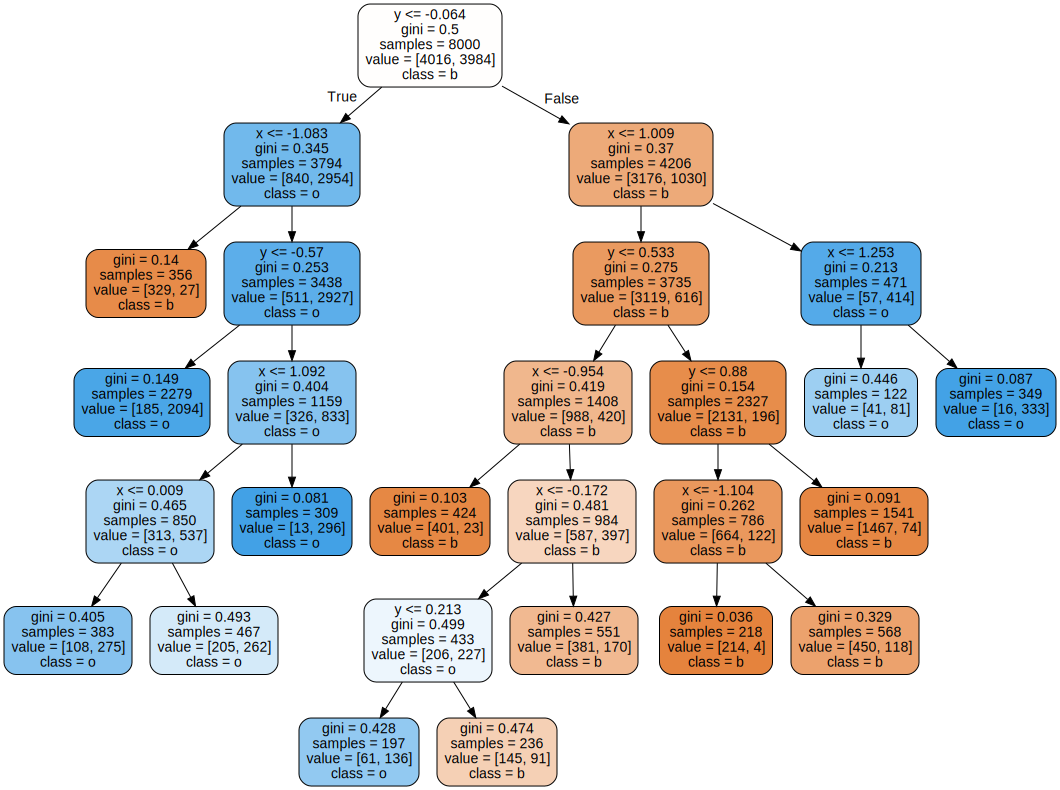

In [136]:
dot_data = export_graphviz(final_model, out_file = None,feature_names=["x","y"],class_names = ["b","o"],rounded = True, filled=True)
graph = graphviz.Source(dot_data)
graph

#### Grow a forest

In [137]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [144]:
len(mini_sets)

1000

In [147]:
mini_sets[0][0].shape

(100, 2)

In [148]:
mini_sets[0][1].shape

(100,)

In [203]:
Xtoy = np.concatenate((np.array(range(100)).reshape(100,1), 2*np.array(range(100)).reshape(100,1)),axis = 1)
ytoy = np.array(range(100))*0.1

In [216]:
rs_toy = ShuffleSplit(n_splits = 5, test_size = 100-10,random_state = 42)

In [217]:
for train_index, test_index in rs_toy.split(Xtoy):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #print(Xtoy[train_index])
    print(ytoy[train_index])

[9.1 7.4 8.6 8.2 2.  6.  7.1 1.4 9.2 5.1]
[7.2 0.6 2.7 4.  0.4 3.2 9.7 3.4 0.7 8. ]
[6.9 3.1 8.9 4.3 5.2 0.1 1.8 0.  9.6 9.5]
[2.6 0.7 5.3 5.  3.7 2.9 2.1 8.5 5.8 7.5]
[3.9 5.4 4.6 9.3 0.5 6.7 0.4 5.9 5.2 0.7]


In [163]:
from sklearn.base import clone

forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8001064999999999

In [164]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [165]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [168]:
accuracy_score(y_pred_majority_votes.reshape(-1),y_test)

0.86